In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adtk.visualization import plot as adtk_plot

In [3]:
df_og = pd.read_csv('data/billing_data.csv', index_col='usage_end_time', parse_dates=True)

In [4]:
df_future = df_og.loc['2023-12-08':].copy()

dates = df_future.index.unique()
print('Shape: ', df_future.shape, 'with total days: ', len(dates))

Shape:  (704260, 5) with total days:  6051


<Axes: xlabel='usage_end_time'>

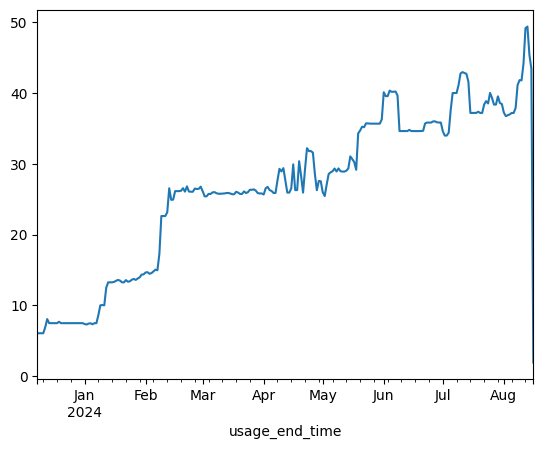

In [5]:
df_future['cost'].resample('D').sum().plot()

### Daily

Seed Date:  2024-02-04 00:00:00
End Date:  2024-02-09 00:00:00
Target Date:  2024-02-08 00:00:00
Feature Date:  2024-02-07 00:00:00


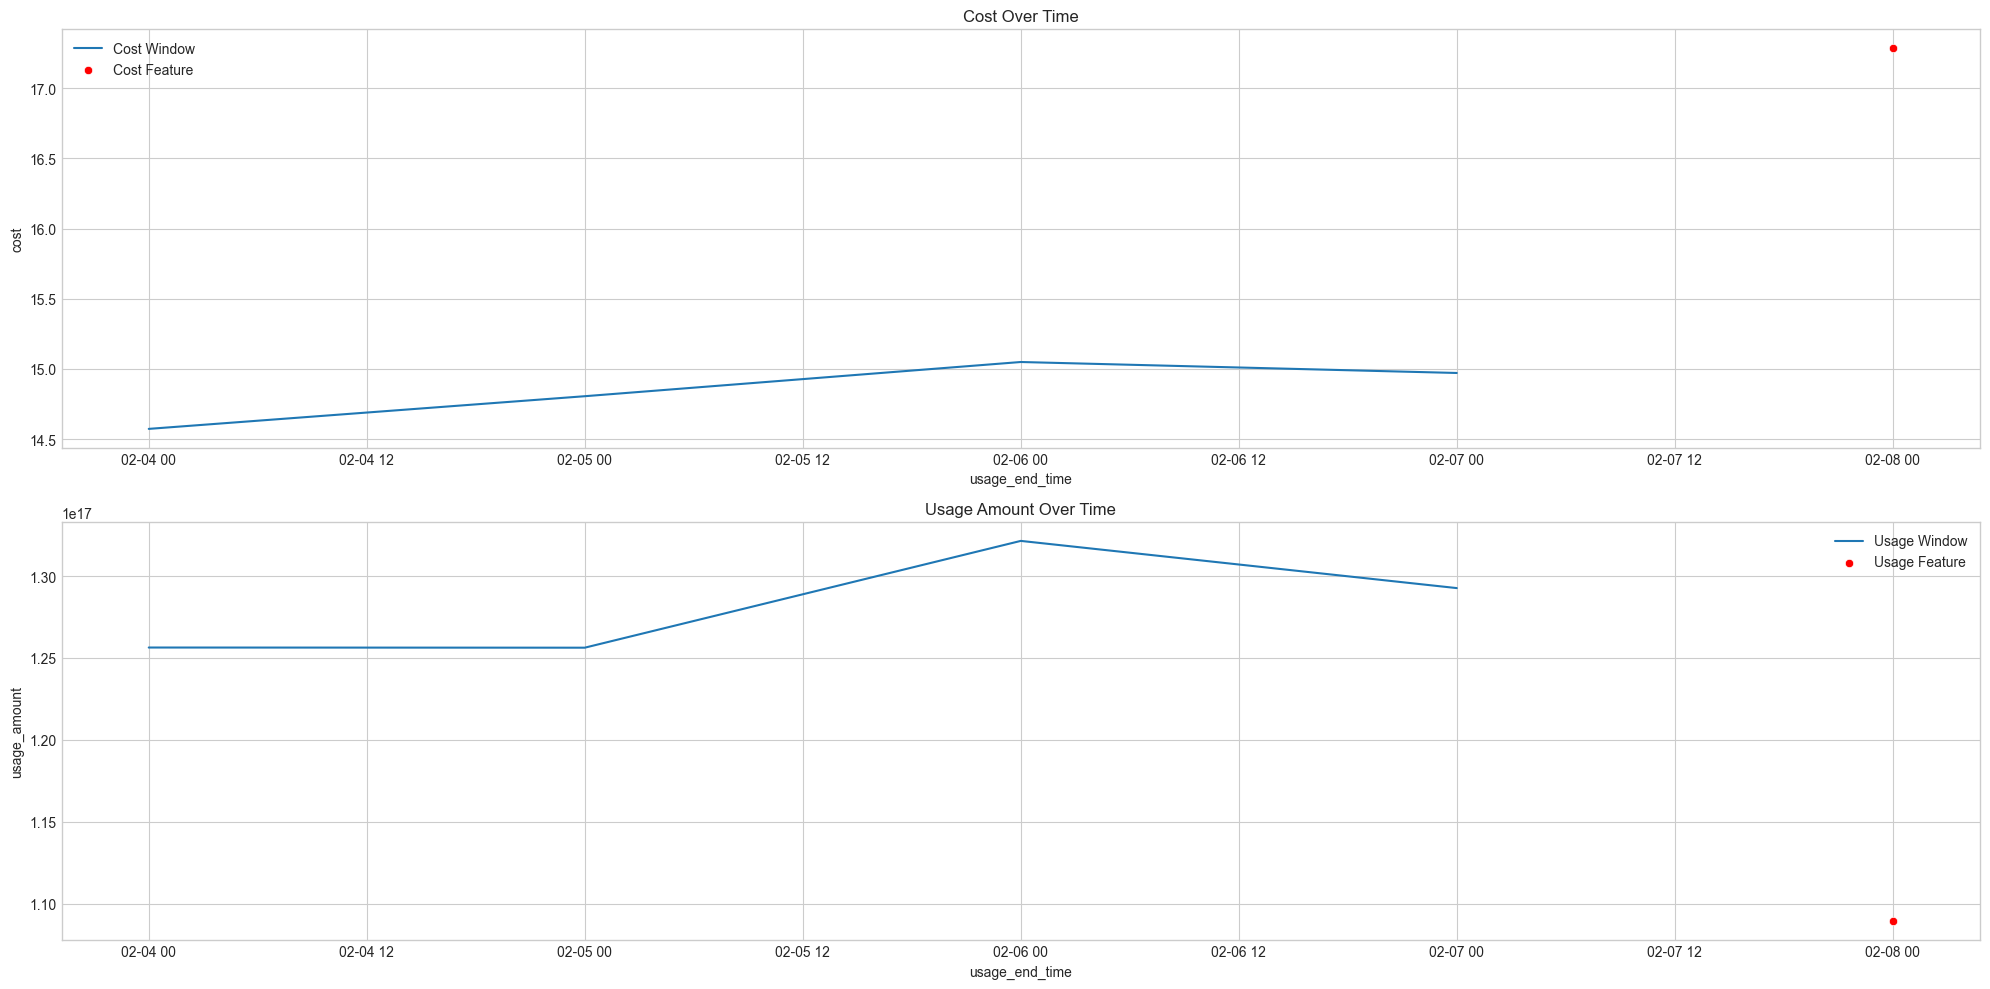

In [41]:
resolution = 'D'

seed = '2024-02-04'
num_days = 6  # Max 254

seed_date = pd.to_datetime(seed)
end_date = seed_date + pd.Timedelta(days=num_days-1)
target_date = seed_date + pd.Timedelta(days=num_days - 2)
target_date_str = target_date.strftime('%Y-%m-%d')
feature_date = seed_date + pd.Timedelta(days=num_days - 3)
feature_date_str = feature_date.strftime('%Y-%m-%d')

# target_date = pd.Timestamp(target_date).date('YYYY-MM-DD')

print('Seed Date: ', seed_date)
print('End Date: ', end_date)
print('Target Date: ', target_date)
print('Feature Date: ', feature_date)

feature_dates = df_future[(df_future.index >= seed_date) & (df_future.index < end_date)].index.unique()

# print('Unique dates: ', feature_dates[-1]) Anomaly at 2024-04-16 09:00:00

df_current = df_future.loc[df_future.index.isin(feature_dates)]
df_current = df_current.resample(resolution).sum()

fig, ax = plt.subplots(2, 1, figsize=(20, 10))

sns.lineplot(data=df_current.iloc[:-1]['cost'], label='Cost Window', ax=ax[0])
sns.scatterplot(data=df_current.iloc[-1:]['cost'], label='Cost Feature', color='red', ax=ax[0])

sns.lineplot(data=df_current.iloc[:-1]['usage_amount'], label='Usage Window', ax=ax[1])
sns.scatterplot(data=df_current.iloc[-1:]['usage_amount'], label='Usage Feature', color='red', ax=ax[1])

ax[0].set_title('Cost Over Time')
ax[1].set_title('Usage Amount Over Time')

ax[0].grid(True)
ax[1].grid(True)
plt.tight_layout()
plt.show()


In [42]:
# What can we extract from here?
arr_target = df_current[-1:]
df_target = df_future.loc[target_date_str] 

arr_cost = df_current.iloc[:-1]['cost'].values
arr_usage = df_current.iloc[:-1]['usage_amount'].values

df_upto = df_future.loc[:feature_date_str]
df_services = df_upto['service_type'].value_counts()
df_regions = df_upto['region'].value_counts()

### Service anomalies

In [63]:
threshold_frequency = 50

frequent_services = df_services[df_services > threshold_frequency].index

df_anomalies = df_target.copy()

anomalies = []

for i in range(len(df_target)):
    value = False
    if df_target.iloc[i]['service_type'] not in frequent_services:
        value = True
    anomalies.append(value)

df_anomalies['anomaly'] = anomalies


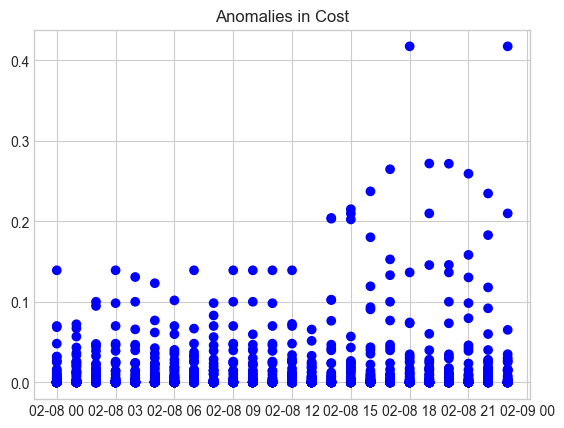

In [66]:
plot_colors = df_anomalies['anomaly'].map({True: 'red', False: 'blue'})

plt.scatter(df_anomalies.index, df_anomalies['cost'], c=plot_colors)
plt.title('Anomalies in Cost')
plt.grid(True)
plt.show()

### Hourly

array([<Axes: >, <Axes: >], dtype=object)

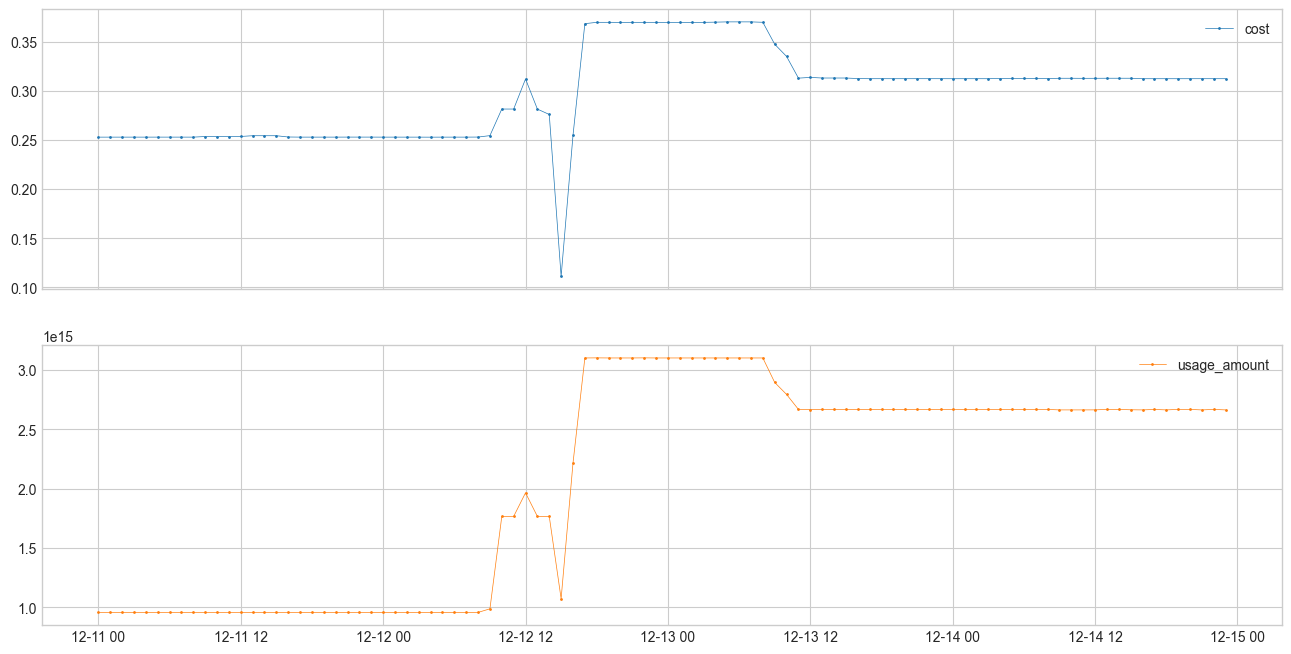

In [10]:
num_days = 3  # Max 254
seed =  3

unique_dates = df_future.index.unique()[seed * 24:seed * 24 + (num_days + 1)  * 24]

# print('Unique dates: ', unique_dates)

df_current = df_future.loc[df_future.index.isin(unique_dates)]

adtk_plot(pd.concat([df_current['cost'].resample('h').sum(), df_current['usage_amount'].resample('h').sum()], axis=1))

array([<Axes: >, <Axes: >], dtype=object)

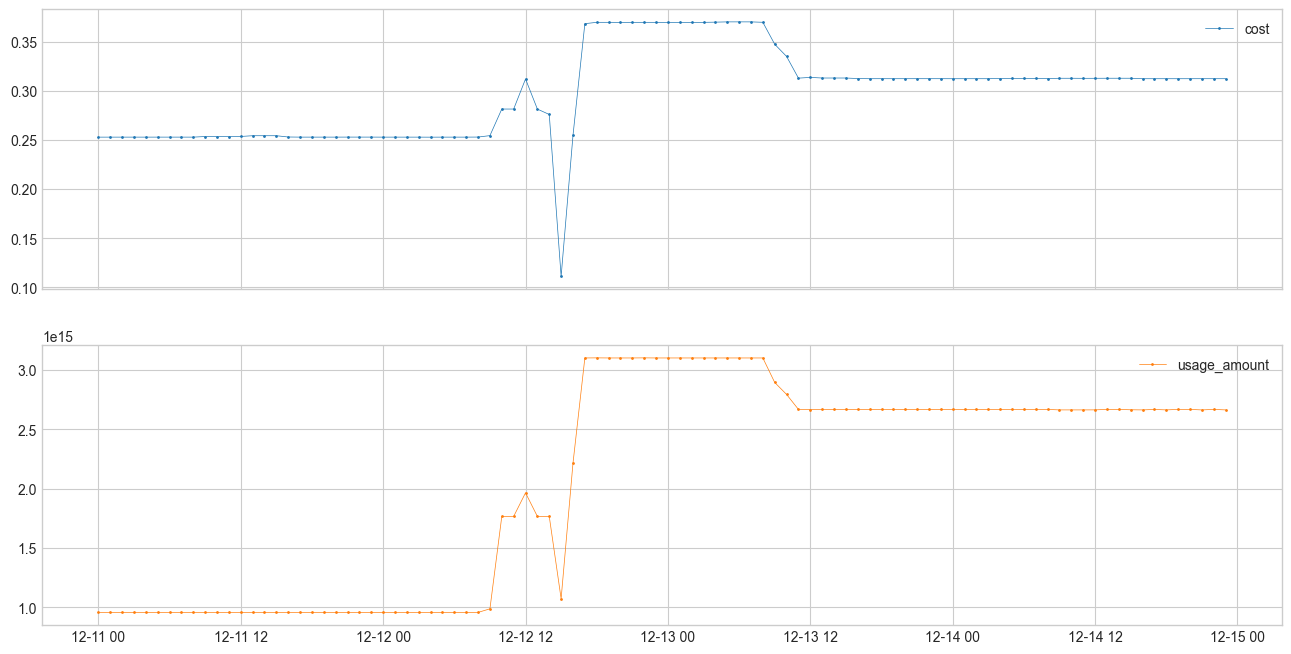

In [11]:
num_days = 3  # Max 254
seed =  3

unique_dates = df_future.index.unique()[seed * 24:seed * 24 + (num_days + 1)  * 24]

# print('Unique dates: ', unique_dates)

df_current = df_future.loc[df_future.index.isin(unique_dates)]

adtk_plot(pd.concat([df_current['cost'].resample('h').sum(), df_current['usage_amount'].resample('h').sum()], axis=1))